Imports:

In [ ]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

Read Excel file as a pandas DF:

In [ ]:
df = pd.read_excel('GooglePlaystore.xlsx')
df

Remove record where "Reviews" = "3.0M"

In [ ]:
df = df[df['Reviews'] != '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


Remove rows where any col has the value "Varies with device"

In [ ]:
df = df[~df.isin(['Varies with device']).any(axis=1)]

Clean Android Version col:

In [ ]:
def clean(data):
    match = re.search(r'^(\d{1,2}.\d{1,2}).\d{0,2}.*$', data)
    if match:
        n = match.group(1)
        return float(n)

df['Android Ver'] = df['Android Ver'].astype(str).apply(clean)

/tmp/ipykernel_3320707/3017340040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Android Ver'] = df['Android Ver'].astype(str).apply(clean)


In [ ]:
def installs(data):
    return re.sub(r'(\d{1,3}),?(\d{1,3})?,?(\d{1,3})?,?(\d{1,3})?\+?', r'\1\2\3', data)
df['Installs'] = df['Installs'].astype(str).apply(installs)
df['Installs'] = df['Installs'].astype(float)

/tmp/ipykernel_3320707/2716711504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(str).apply(installs)
/tmp/ipykernel_3320707/2716711504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(float)


Missing Ratings

In [ ]:
df = df[~(df['Rating'].isna() & (df['Reviews'] < 100) & (df['Installs'] < 50000))]
category_avg = df.groupby('Category')['Rating'].mean().round(2)
df.loc[:, 'Rating'] = df.apply(
    lambda row: category_avg[row['Category']] if pd.isna(row['Rating']) else row['Rating'],
    axis=1)

Preprocess Size Column:

In [ ]:
def convert_size(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return int(float(value[:-1]) * 1000000)
        elif value.endswith('k'):
            return int(float(value[:-1]) * 1000)
    return np.nan  

df.loc[:, 'Size'] = df['Size'].apply(convert_size)

Describe by Column:

In [ ]:
df['Reviews'] = df['Reviews'].astype(float)
df['Size'] = df['Size'].astype(float)
df['Price'] = df['Price'].astype(float)
df.describe()

,Rating,Reviews,Size,Installs,Price,Android Ver
count,7685.000000,7.685000e+03,7.685000e+03,7.685000e+03,7685.000000,7683.000000
mean,4.172586,2.925749e+05,2.285185e+07,6.815380e+06,1.130759,3.851751
std,0.544635,1.867324e+06,2.340028e+07,3.382845e+07,17.450317,0.852644
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000,1.000000
25%,4.000000,1.050000e+02,5.200000e+06,1.000000e+04,0.000000,4.000000
50%,4.300000,2.167000e+03,1.400000e+07,1.000000e+05,0.000000,4.100000
75%,4.500000,3.723700e+04,3.300000e+07,1.000000e+06,0.000000,4.200000
max,5.000000,4.489389e+07,1.000000e+08,5.000000e+08,400.000000,8.000000


Next

In [ ]:
free = df[df['Price'] == 0]
def func(data, column):
    sorted_df = data.sort_values(by=['Category', column], ascending=[True, False])
    top_3 = sorted_df.groupby('Category').head(3)
    return top_3.reset_index(drop=True)

top_rated = func(free, 'Rating')
top_installed = func(free, 'Installs')
top_reviewed = func(free, 'Reviews')
print(top_rated)
print(top_installed)
print(top_reviewed)

                                                  App           Category  \
0             Spring flowers theme couleurs d t space     ART_AND_DESIGN   
1                          Harley Quinn wallpapers HD     ART_AND_DESIGN   
2                                   Cardi B Wallpaper     ART_AND_DESIGN   
3   Tickets SDA 2018 and Exam from the State Traff...  AUTO_AND_VEHICLES   
4                      CDL Practice Test 2018 Edition  AUTO_AND_VEHICLES   
..                                                ...                ...   
94  DU Recorder – Screen Recorder, Video Editor, Live      VIDEO_PLAYERS   
95                                          AJ Player      VIDEO_PLAYERS   
96                                   Weather forecast            WEATHER   
97                                   Live Weather Pro            WEATHER   
98                         weather - weather forecast            WEATHER   

    Rating    Reviews        Size    Installs  Type  Price Content Rating  \
0      5.0

In [ ]:
costly = df[df['Price'] != 0]
cmean = costly['Price'].mean()
cmin = costly['Price'].min()
cmax = costly['Price'].max()
print(f'Min: {cmin}, Max: {cmax}, Avg: {cmean}')

Min: 0.99, Max: 400.0, Avg: 15.139163763066204


Visualization Pt 1:

In [ ]:
df['Genres'] = df['Genres'].str.split(';')
df = df.explode('Genres').reset_index(drop=False)
genre_counts = df['Genres'].value_counts()
genre_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('App Distribution by Genre')
plt.ylabel('') 
plt.show()

Visualization Pt 2:

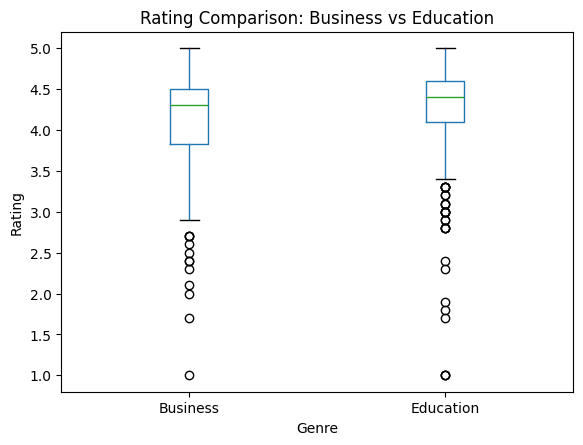

In [ ]:
genres_to_plot = ['Business', 'Education']
subset = df[df['Genres'].isin(genres_to_plot)]

subset.boxplot(column='Rating', by='Genres', grid=False)
plt.title('Rating Comparison: Business vs Education')
plt.suptitle('')  
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()